In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ARIMA_model import arima_forecast
from SARIMA_model import sarima_forecast
from prophet_model import prophet_forecast
from xgboost_model import xgboost_forecast
from gan_model import gan_forecast
from nn_model import nn_forecast
from lstm_model import lstm_forecast
from gru_model import gru_forecast
from seq2seq_model import seq2seq_forecast
from transformer_model import transformer_forecast
from tcn_model import tcn_forecast
from deepar_model import deepar_forecast


# Load time series data
data = pd.read_csv('SP500_data.csv')

time_series_data = pd.DataFrame()
# Add the 'DATE' column to time_series_data and ensure it's a datetime type
time_series_data['DATE'] = pd.to_datetime(data['DATE'])

# Ensure Value is numeric
time_series_data['SP500'] = pd.to_numeric(data['SP500'], errors='coerce')

time_series_data.dropna(inplace=True)
time_series_data.head(10)

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-12 02:17:10.790889: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-12 02:17:10.792670: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-12 02:17:10.796599: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-12 02:17:10.807576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to registe

,DATE,SP500
0,2020-01-02,3257.85
1,2020-01-03,3234.85
2,2020-01-06,3246.28
3,2020-01-07,3237.18
4,2020-01-08,3253.05
5,2020-01-09,3274.70
6,2020-01-10,3265.35
7,2020-01-13,3288.13
8,2020-01-14,3283.15
9,2020-01-15,3289.29


In [2]:
# Create arima_data with DATE as an index, without affecting the original time_series_data
arima_data = time_series_data.set_index('DATE', inplace=False)

# Now, check the dtypes of both DataFrames
print(time_series_data.dtypes)  # Original DataFrame remains unchanged
print(arima_data.dtypes)        # New DataFrame will not include the DATE column

DATE     datetime64[ns]
SP500           float64
dtype: object
SP500    float64
dtype: object


In [3]:
# Get ARIMA predictions
arima_predictions = arima_forecast(arima_data, (1, 1, 0), 100)

#print(arima_predictions)

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/envs/myconda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/envs/myconda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/envs/myconda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer

In [4]:
# Get SARIMA predictions
sarima_predictions = sarima_forecast(arima_data, (1, 1, 1), (1, 1, 1, 12), 100)
#print(sarima_predictions)

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/envs/myconda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/envs/myconda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/root/miniconda3/envs/myconda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a s

In [5]:
# Use Prophet model for prediction
prophet_predictions = prophet_forecast(arima_data, 100)

02:17:17 - cmdstanpy - INFO - Chain [1] start processing
02:17:18 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# XGBoost forecast
xgboost_predictions, mse, test_dates = xgboost_forecast(arima_data, 10, 0.1)

In [7]:
# GAN forecast
gan_predictions = gan_forecast(arima_data, 10, 50, 64)

2024-09-12 02:17:20.072892: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/root/miniconda3/envs/myconda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/root/miniconda3/envs/myconda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(acti

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


/root/miniconda3/envs/myconda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.724112868309021 | G loss: [array(0.707531, dtype=float32), array(0.707531, dtype=float32), array(0.2734375, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

In [9]:
# NN forecast
nn_predictions, nn_test_dates = nn_forecast(arima_data, 10, epochs=50, batch_size=64)

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [10]:
# LSTM forecast with specified batch_size
lstm_predictions, lstm_test_dates = lstm_forecast(arima_data, time_step=10, epochs=50, batch_size=64)

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [11]:
# GRU forecast with specified batch_size
gru_predictions, gru_test_dates = gru_forecast(arima_data, time_step=10, epochs=50, batch_size=64)

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [12]:
# transformer forecast
transformer_predictions, transformer_test_dates = transformer_forecast(arima_data, time_step=10, epochs=50, batch_size=64)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [13]:
# Seq2Seq forecast
seq2seq_predictions, seq2seq_test_dates = seq2seq_forecast(arima_data, time_step=10, epochs=50, batch_size=64)

2024-09-12 02:18:37.660925: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [14]:
# TCN forecast
tcn_predictions, tcn_test_dates = tcn_forecast(arima_data, time_step=10, epochs=50, batch_size=64)

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [15]:
# DeepAR forecast
deepar_predictions, deepar_test_dates = deepar_forecast(arima_data, time_step=10, epochs=50, batch_size=64)

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


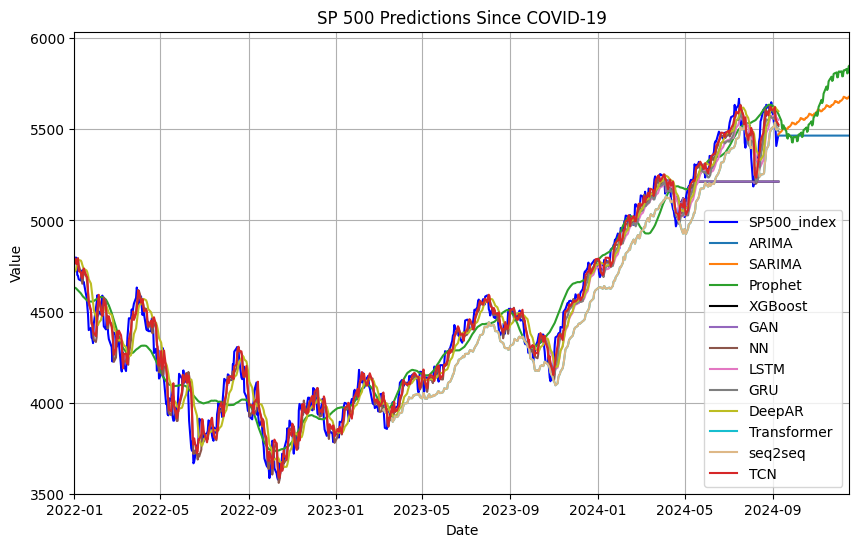

In [18]:
# Plot the original data and predictions
plt.figure(figsize=(10,6))
plt.plot(arima_data.index, arima_data['SP500'], label='SP500_index',color = '#0000FF')

# Generate future dates for predictions
future_dates = pd.date_range(arima_data.index[-1], periods=100, freq='D')

# Plot ARIMA predictions
plt.plot(future_dates, arima_predictions, label='ARIMA', color='#1f77b4')

# Plot SARIMA predictions
plt.plot(future_dates, sarima_predictions, label='SARIMA', color='#ff7f0e')

# Plot Prophet predictions
plt.plot(prophet_predictions['ds'], prophet_predictions['yhat'], label='Prophet', color='#2ca02c')

# Plot XGBoost predictions
plt.plot(test_dates, xgboost_predictions, label='XGBoost', color='black')

# Plot GAN predictions
plt.plot(test_dates, xgboost_predictions, label='GAN', color='#9467bd')

# Plot NN predictions
plt.plot(nn_test_dates, nn_predictions, label='NN', color='#8c564b')

# Plot LSTM predictions
plt.plot(lstm_test_dates, lstm_predictions, label='LSTM', color='#e377c2')

# Plot GRU predictions
plt.plot(gru_test_dates, gru_predictions, label='GRU', color='#7f7f7f')

# Plot DeepAR predictions
plt.plot(deepar_test_dates, deepar_predictions, label='DeepAR', color='#bcbd22')

# Plot Transformer predictions
plt.plot(transformer_test_dates, transformer_predictions, label='Transformer', color='#17becf')

# Plot Seq2Seq predictions
plt.plot(transformer_test_dates, transformer_predictions, label='seq2seq', color='#DEB887')

# Plot TCN predictions
plt.plot(tcn_test_dates, tcn_predictions, label='TCN', color='#d62728')

# Customize plot
plt.title('SP 500 Predictions Since COVID-19')
plt.xlabel('Date')
plt.ylabel('Value')

# Set x-axis limits to start from 2023-01-01
plt.xlim(pd.to_datetime('2022-01-01'), future_dates[-1])

# Set y-axis limits starting at 4000
plt.ylim(3500, None)

plt.legend()
plt.grid(True)
plt.show()